# Ride Research


## Introduction
The task is based around a bike sharing dataset openly available at UCI Machine Learning Repository [1].
Please go through the steps below, build up the necessary code and comment on your choices.

## Part 1 - Data Loading and Environment Preparation

**Tasks:**

- [x] Prepare a Python 3 virtual environment (with virtualenv command). The `requirements.txt` output of the `pip freeze` command should be included as part of your submission.
- [x] Load the data from the UCI Repository and put it into the same folder with the notebook. The link to it is [UCI Machine Learning Repository - Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset). Here is an available mirror in case the above website is down: [Data.World - Bike Sharing Dataset](https://data.world/uci/bike-sharing-dataset).
- [x] Split the data into two parts: one dataset containing the last 30 days and one dataset with the rest.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# read raw data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**OUTCOMES:**
1. Uploaded necessary libraries
2. Uploaded dataset
3. Created file requirements.txt

## Part 2 - Data Processing and Analysis

**Tasks:**
1. [x] Perform all needed steps to load and clean the data. Please comment the major steps of your code.
2. [x] Visualise rentals of bikes per day.
3. [x] Assume that each bike has exactly maximum 12 rentals per day.
    * Find the maximum number of bicycles `nmax` that was needed in any one day.
    * Find the 95%-percentile of bicycles `n95` that was needed in any one day.
5. [x] Visualize the distribution of the covered days depending on the number of available bicycles (e.g. `nmax` bicycles would cover 100% of days, `n95` covers 95%, etc.)


### 2.1. Exploratory Data Analisys

In [3]:
# check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
# check duplicates
df[df.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [5]:
# check data types and change if needed
df['dteday'] = pd.to_datetime(df['dteday'])

In [6]:
# check ranges
df['dteday'].min(), df['dteday'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-31 00:00:00'))

In [7]:
# Dictionary mapping column names to descriptive names
columns_to_check = {
    'season': 'Season',
    'yr': 'Year',
    'mnth': 'Month',
    'holiday': 'Holiday',
    'weekday': 'Weekday',
    'workingday': 'Working Day'
}

# Iterate through the dictionary and print value counts
for column, description in columns_to_check.items():
    print(f"Value counts for {description}:")
    print(df[column].value_counts())
    print("-----------------------------------------")


Value counts for Season:
season
3    188
2    184
1    181
4    178
Name: count, dtype: int64
-----------------------------------------
Value counts for Year:
yr
1    366
0    365
Name: count, dtype: int64
-----------------------------------------
Value counts for Month:
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64
-----------------------------------------
Value counts for Holiday:
holiday
0    710
1     21
Name: count, dtype: int64
-----------------------------------------
Value counts for Weekday:
weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64
-----------------------------------------
Value counts for Working Day:
workingday
1    500
0    231
Name: count, dtype: int64
-----------------------------------------


**Check Distribution of Casual and Registered Rentals to see the patterns**

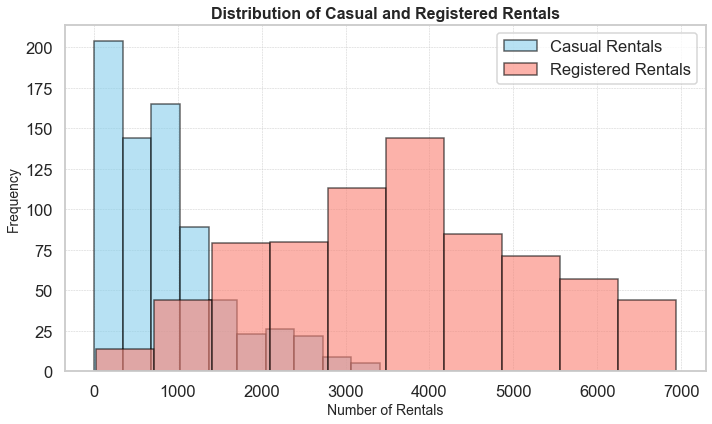

In [8]:
# Set the style and context using Seaborn
sns.set_theme(style="whitegrid", context="talk")  # "talk" = larger fonts, good for presentations

# Create a figure
plt.figure(figsize=(10, 6))

# Plot histogram for 'casual'
plt.hist(df['casual'], color='skyblue', edgecolor='black', alpha=0.6, label='Casual Rentals')

# Plot histogram for 'registered'
plt.hist(df['registered'], color='salmon', edgecolor='black', alpha=0.6, label='Registered Rentals')

# Set title and labels
plt.title('Distribution of Casual and Registered Rentals', fontsize=16, weight='bold')
plt.xlabel('Number of Rentals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a legend
plt.legend()

# Add grid lines for better readability
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


**Check Correlation number of rides and other features**

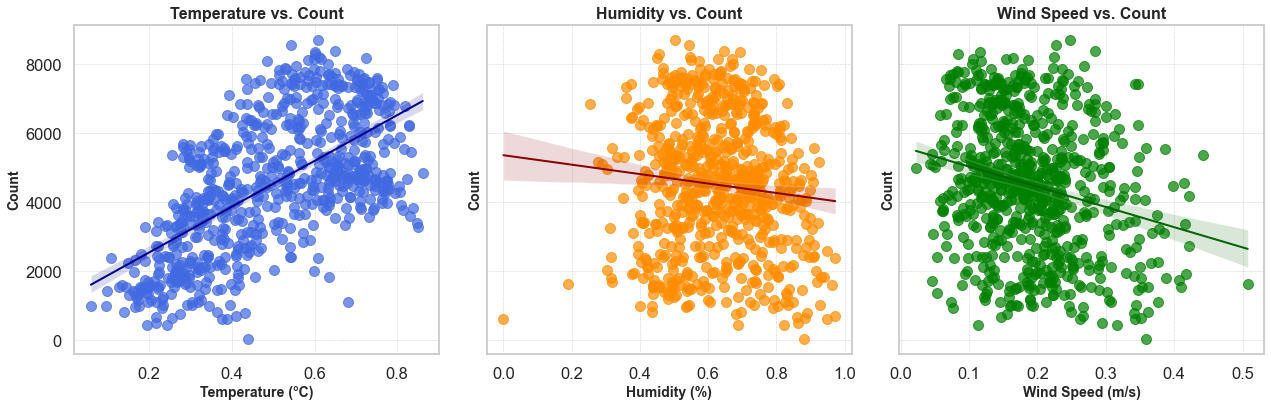

In [9]:
# Set the style and context for a more professional look
sns.set(style='whitegrid', context='talk')

# Create a figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Scatter plot and trend line for Temperature vs. Count
sns.regplot(x='temp', y='cnt', data=df, ax=axs[0], scatter_kws={'color': 'royalblue', 's': 100, 'alpha': 0.7},
            line_kws={'color': 'darkblue', 'linewidth': 2})
axs[0].set_title('Temperature vs. Count', fontsize=16, weight='bold')
axs[0].set_xlabel('Temperature (°C)', fontsize=14, weight='bold')
axs[0].set_ylabel('Count', fontsize=14, weight='bold')
axs[0].grid(True, linestyle='--', linewidth=0.5)

# Scatter plot and trend line for Humidity vs. Count
sns.regplot(x='hum', y='cnt', data=df, ax=axs[1], scatter_kws={'color': 'darkorange', 's': 100, 'alpha': 0.7},
            line_kws={'color': 'darkred', 'linewidth': 2})
axs[1].set_title('Humidity vs. Count', fontsize=16, weight='bold')
axs[1].set_xlabel('Humidity (%)', fontsize=14, weight='bold')
axs[1].set_ylabel('Count', fontsize=14, weight='bold')
axs[1].grid(True, linestyle='--', linewidth=0.5)

# Scatter plot and trend line for Wind Speed vs. Count
sns.regplot(x='windspeed', y='cnt', data=df, ax=axs[2], scatter_kws={'color': 'green', 's': 100, 'alpha': 0.7},
            line_kws={'color': 'darkgreen', 'linewidth': 2})
axs[2].set_title('Wind Speed vs. Count', fontsize=16, weight='bold')
axs[2].set_xlabel('Wind Speed (m/s)', fontsize=14, weight='bold')
axs[2].set_ylabel('Count', fontsize=14, weight='bold')
axs[2].grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()  
plt.show()


**Create heatmap to see all interesting features**

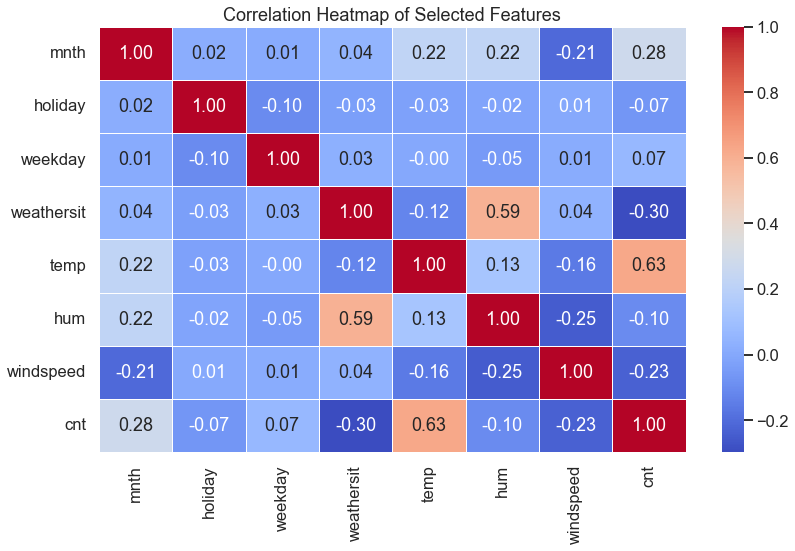

In [10]:
# Select the relevant columns
columns_of_interest = ['mnth', 'holiday', 'weekday', 'weathersit', 
                       'temp', 'hum', 'windspeed', 'cnt']

# Create a DataFrame with only the selected columns
df_subset = df[columns_of_interest]

# Compute the correlation matrix
corr_matrix = df_subset.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Customize the plot
plt.title('Correlation Heatmap of Selected Features')
plt.tight_layout()

# Show the plot
plt.show()


**Compare years**

/var/folders/1w/fxwbqyv52h5bq4v1v80dmd4w0000gn/T/ipykernel_10951/466163011.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='yr', y='cnt', data=df, palette='pastel', showfliers=False, linewidth=1.5)


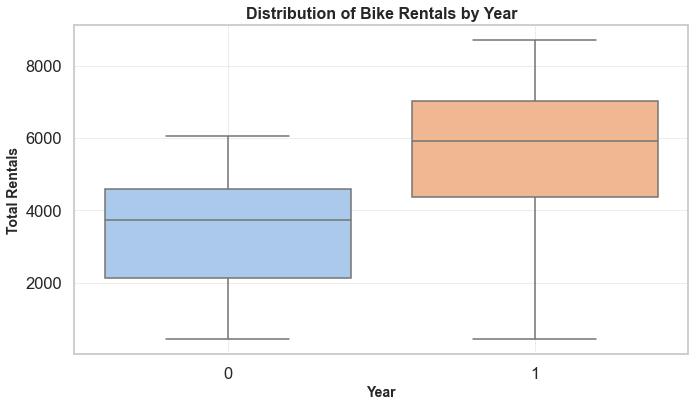

In [11]:
# Set the style and context for a more professional look
sns.set(style='whitegrid', context='talk')

# Create a figure
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x='yr', y='cnt', data=df, palette='pastel', showfliers=False, linewidth=1.5)

# Set title and labels
plt.title('Distribution of Bike Rentals by Year', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14, weight='bold')
plt.ylabel('Total Rentals', fontsize=14, weight='bold')

# Add grid lines for better readability
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()  
plt.show()

**Compare rentals for each year**

/var/folders/1w/fxwbqyv52h5bq4v1v80dmd4w0000gn/T/ipykernel_10951/3146174703.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=monthly_counts[monthly_counts['yr'] == 0], palette=bar_palette, edgecolor='black', ax=axs[0])
/var/folders/1w/fxwbqyv52h5bq4v1v80dmd4w0000gn/T/ipykernel_10951/3146174703.py:17: UserWarning: 
The palette list has fewer values (12) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='mnth', y='cnt', data=monthly_counts[monthly_counts['yr'] == 0], palette=bar_palette, edgecolor='black', ax=axs[0])
/var/folders/1w/fxwbqyv52h5bq4v1v80dmd4w0000gn/T/ipykernel_10951/3146174703.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same e

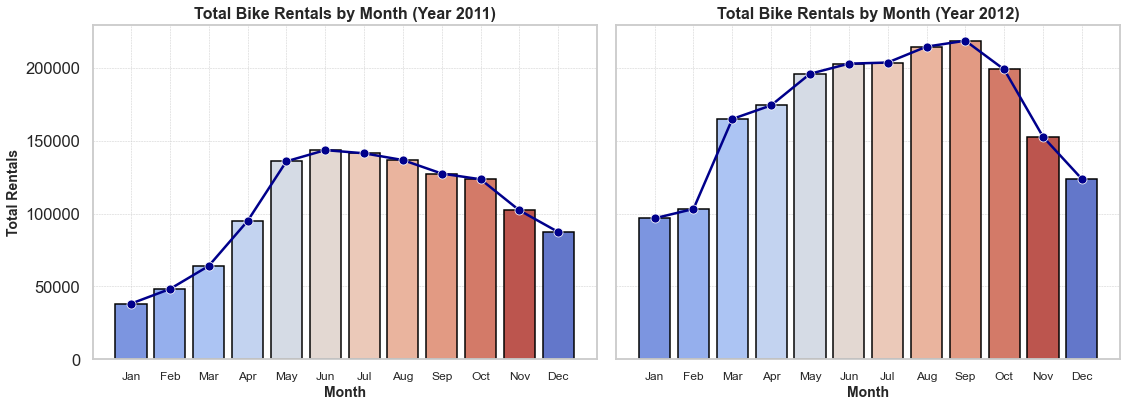

In [12]:
# Group by month and year, then calculate total count
monthly_counts = df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Convert month to categorical with a specific order
monthly_counts['mnth'] = pd.Categorical(monthly_counts['mnth'], categories=range(0, 13), ordered=True)

# Set the style and context for a more professional look
sns.set(style='whitegrid', context='talk')

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Define a color palette for the bar chart
bar_palette = sns.color_palette("coolwarm", n_colors=12)

# Plot for Year 0
sns.barplot(x='mnth', y='cnt', data=monthly_counts[monthly_counts['yr'] == 0], palette=bar_palette, edgecolor='black', ax=axs[0])
sns.lineplot(x='mnth', y='cnt', data=monthly_counts[monthly_counts['yr'] == 0], ax=axs[0], color='darkblue', marker='o', linewidth=2.5)
axs[0].set_title('Total Bike Rentals by Month (Year 2011)', fontsize=16, weight='bold')
axs[0].set_xlabel('Month', fontsize=14, weight='bold')
axs[0].set_ylabel('Total Rentals', fontsize=14, weight='bold')
axs[0].set_xticks(range(1, 13))
axs[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
axs[0].grid(True, linestyle='--', linewidth=0.5)

# Plot for Year 1
sns.barplot(x='mnth', y='cnt', data=monthly_counts[monthly_counts['yr'] == 1], palette=bar_palette, edgecolor='black', ax=axs[1])
sns.lineplot(x='mnth', y='cnt', data=monthly_counts[monthly_counts['yr'] == 1], ax=axs[1], color='darkblue', marker='o', linewidth=2.5)
axs[1].set_title('Total Bike Rentals by Month (Year 2012)', fontsize=16, weight='bold')
axs[1].set_xlabel('Month', fontsize=14, weight='bold')
axs[1].set_ylabel('Total Rentals', fontsize=14, weight='bold')
axs[1].set_xticks(range(1, 13))
axs[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
axs[1].grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()  
plt.show()


**Observe rentals with season breakdown**

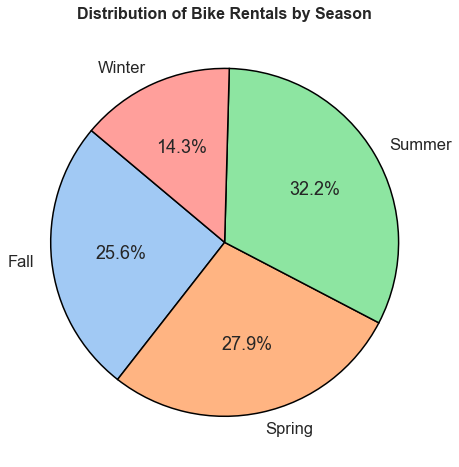

In [13]:
# Map season codes to names
season_mapping = {
    1: 'Winter',
    2: 'Spring',
    3: 'Summer',
    4: 'Fall'
}

# Add a new column for season names based on the mapping
df['season_name'] = df['season'].map(season_mapping)

# Group by season and calculate total count
season_counts = df.groupby('season_name')['cnt'].sum().reset_index()

# Set the style and context for a more professional look
sns.set(style='whitegrid', context='talk')

# Create a figure
plt.figure(figsize=(8, 8))

# Plot the pie chart
plt.pie(season_counts['cnt'], labels=season_counts['season_name'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"), wedgeprops=dict(edgecolor='black'))

# Set the title
plt.title('Distribution of Bike Rentals by Season', fontsize=16, weight='bold')

# Show the plot
plt.show()

**Transform Normalized temerature to observe it via days and seasons**

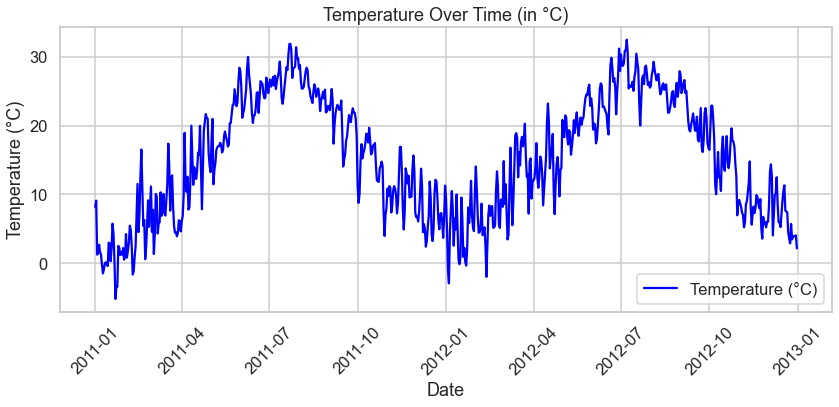

In [14]:
# Define t_min and t_max
t_min = -8  # Minimum temperature in Celsius
t_max = 39  # Maximum temperature in Celsius

# Calculate actual temperature in Celsius
df['actual_temp'] = df['temp'] * (t_max - t_min) + t_min

# Plot the actual temperature in Celsius
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['dteday'], y=df['actual_temp'], label='Temperature (°C)', color='blue')

# Show the plot
plt.title('Temperature Over Time (in °C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
df['actual_temp'].describe()

count    731.000000
mean      15.283085
std        8.603397
min       -5.220871
25%        7.842925
50%       15.421651
75%       22.804575
max       32.498349
Name: actual_temp, dtype: float64

In [16]:
np.percentile(df['actual_temp'], [5,95])

array([ 2.0377195, 28.13125  ])

/var/folders/1w/fxwbqyv52h5bq4v1v80dmd4w0000gn/T/ipykernel_10951/725801981.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='season_name', y='actual_temp', data=season_temp_avg, palette='coolwarm')


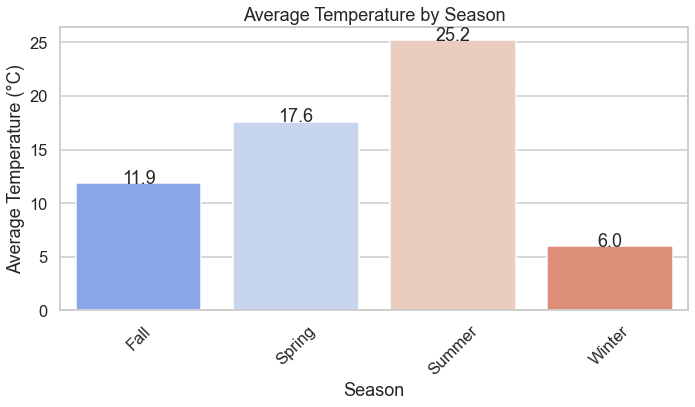

In [17]:
# Calculate the mean temperature for each season
season_temp_avg = df.groupby('season_name')['actual_temp'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='season_name', y='actual_temp', data=season_temp_avg, palette='coolwarm')

# Add labels to each bar
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}', 
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='center',
                      xytext=(0, 5),  # 5 points vertical offset
                      textcoords='offset points')

# Customize the plot
plt.title('Average Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**EDA OUTCOMES:**
1. **Data Integrity**: No duplicates or missing values.
2. **Date Range**: Covers 2011-01-01 to 2012-12-31.
3. **Value Ranges**: All columns have expected ranges.
4. **Rental Patterns**: Registered users ride regularly, while casual users do not.
5. **Correlations**: Positive with temperature, Negative with wind speed, Humidity shows no clear correlation.
6. **Yearly Growth**: 2012 metrics are higher, indicating business growth.
7. **Seasonal Trends**: Rides peak in summer, followed by spring, fall, and winter.
8. **Temperature Percentiles**: 5th and 95th percentiles range between 2°C and 28°C. 

### 2.2. Visualise rentals of bikes per day.

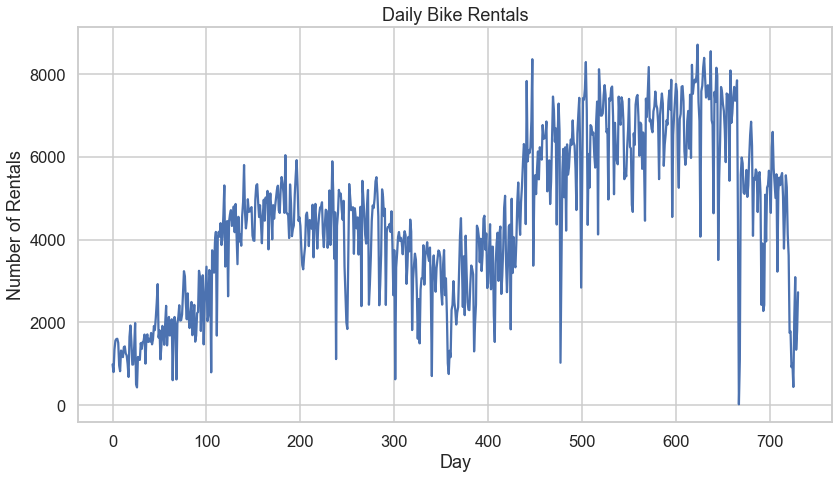

In [18]:
# Create a figure
plt.figure(figsize=(12, 7))

# Plot the number of rentals per day
plt.plot(df.index, df['cnt'])

# Set labels and title
plt.xlabel('Day')
plt.ylabel('Number of Rentals')
plt.title('Daily Bike Rentals')

# Add grid lines
plt.grid(True)

# Show the plot
plt.tight_layout() 
plt.show()


In [19]:
df['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

**RENTAL BIKES PER DAY OUTCOMES:**
1. Yearly Growth & Seasonality: Rentals increased in the second year, with clear seasonal patterns.
2. Rental Stats: Min 22, max 8,714, median 4,548 rides per day.

### 2.3. Assume that each bike has exactly maximum 12 rentals per day.
- Find the maximum number of bicycles nmax that was needed in any one day.
- Find the 95%-percentile of bicycles n95 that was needed in any one day.

In [20]:
# Each bike can be rented a maximum of 12 times per day
df['bikes_needed'] = np.ceil(df['cnt'] / 12).astype(int)

In [21]:
max_v = df['bikes_needed'].max()
p_95 = round(np.percentile(df['bikes_needed'], 95))

print(f"Maximum bikes needed: {max_v}")
print(f"95th percentile of bikes needed: {p_95}")

Maximum bikes needed: 727
95th percentile of bikes needed: 632


**BIKES NEEDED OUTCOME:**
1. Maximum bikes needed in the dataset is 727.
2. 95th percentile bikes needed in the dataset is 632.

### 2.4. Visualize the distribution of the covered days depending on the number of available bicycles (e.g. nmax bicycles would cover 100% of days, n95 covers 95%, etc.)

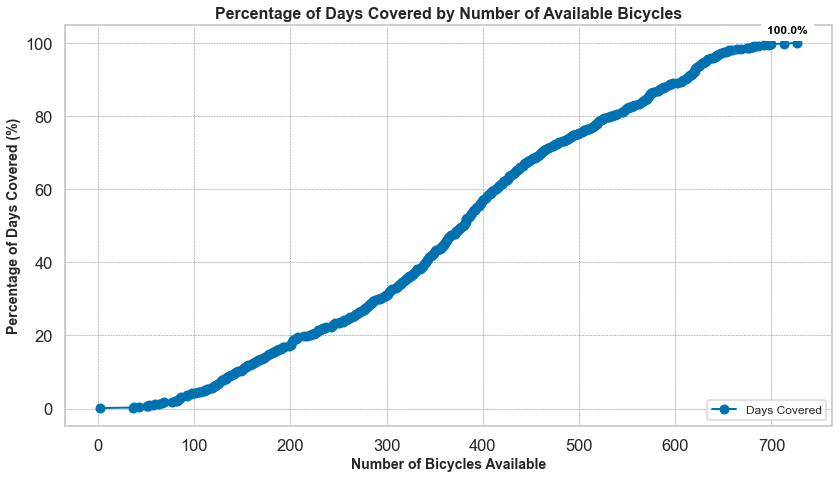

In [22]:
# Number of unique bicycles needed
unique_bikes_needed = np.sort(df['bikes_needed'].unique())

# Calculate the percentage of days that can be covered with 'x' number of bikes
days_covered = [
    (df['bikes_needed'] <= bikes).sum() / len(df) * 100
    for bikes in unique_bikes_needed
]

# Plotting the results
plt.figure(figsize=(12, 7))

# Plot with a professional color and style
plt.plot(unique_bikes_needed, days_covered, label='Days Covered', color='#0072B2', marker='o', linestyle='-', linewidth=2)

# Adding annotations for key points (example: adding annotation for the highest coverage point)
max_coverage_index = np.argmax(days_covered)
max_bikes = unique_bikes_needed[max_coverage_index]
max_coverage = days_covered[max_coverage_index]
plt.annotate(f'{max_coverage:.1f}%', (max_bikes, max_coverage),
             textcoords="offset points", xytext=(-10,10), ha='center',
             fontsize=12, color='black', weight='bold',
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5'))

# Adding title and labels
plt.title('Percentage of Days Covered by Number of Available Bicycles', fontsize=16, weight='bold')
plt.xlabel('Number of Bicycles Available', fontsize=14, weight='bold')
plt.ylabel('Percentage of Days Covered (%)', fontsize=14, weight='bold')

# Adding grid lines with subtle appearance
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Adding a legend with clear positioning
plt.legend(fontsize=12, loc='lower right')

# Show the plot
plt.tight_layout() 
plt.show()

## Part 3 - Building prediction models

**Tasks:**
1. [x] Define a test metric for predicting the daily demand for bike sharing, which you would like to use to measure the accuracy of the constructed models, and explain your choice.
2. [x] Build a demand prediction model with Random Forest, preferably making use of following python libraries: scikit-learn. 
3. [x] Report the value of the chosen test metric on the provided data. 

### 3.1. Define a test metric for predicting the daily demand for bike sharing.

**Metric**: **Root Mean Squared Error (RMSE)**

**Explanation**:

- **Definition**: RMSE measures the square root of the average squared differences between predicted and actual values. It is calculated using the formula:

- **Why RMSE?**:
  - **Interpretability**: RMSE is in the same unit as the target variable (daily bike demand), making it straightforward to understand.
  - **Penalizes Large Errors**: Squaring the errors penalizes larger discrepancies more heavily, which is useful when large errors are particularly problematic.
  - **Common Usage**: RMSE is a standard metric in regression analysis and provides a clear indication of how well the model performs.

### 3.2. Build a demand prediction model with Random Forest, preferably making use of following python libraries: scikit-learn.

In [23]:
# split dataset for last 30 days and the rest

df_last30 = df.tail(30)
df_rest = df.iloc[:-30, :]

In [24]:
# Build a prediction model 

# feature selection
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 
            'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'bikes_needed']

# Target variable
target = 'cnt'

# Split the data into features (X) and target (y)
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.041, shuffle=False)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [25]:
y_pred

array([4648.34, 6230.84, 6587.52, 5711.52, 5371.98, 5009.  , 5582.9 ,
       3216.84, 5172.98, 5499.23, 5316.56, 5525.49, 5603.19, 5043.43,
       3777.94, 4588.52, 5571.09, 5261.7 , 4120.27, 3608.78, 1723.32,
       1807.51,  982.37, 1005.58,  475.64, 2124.99, 3059.38, 1305.43,
       1803.37, 2740.39])

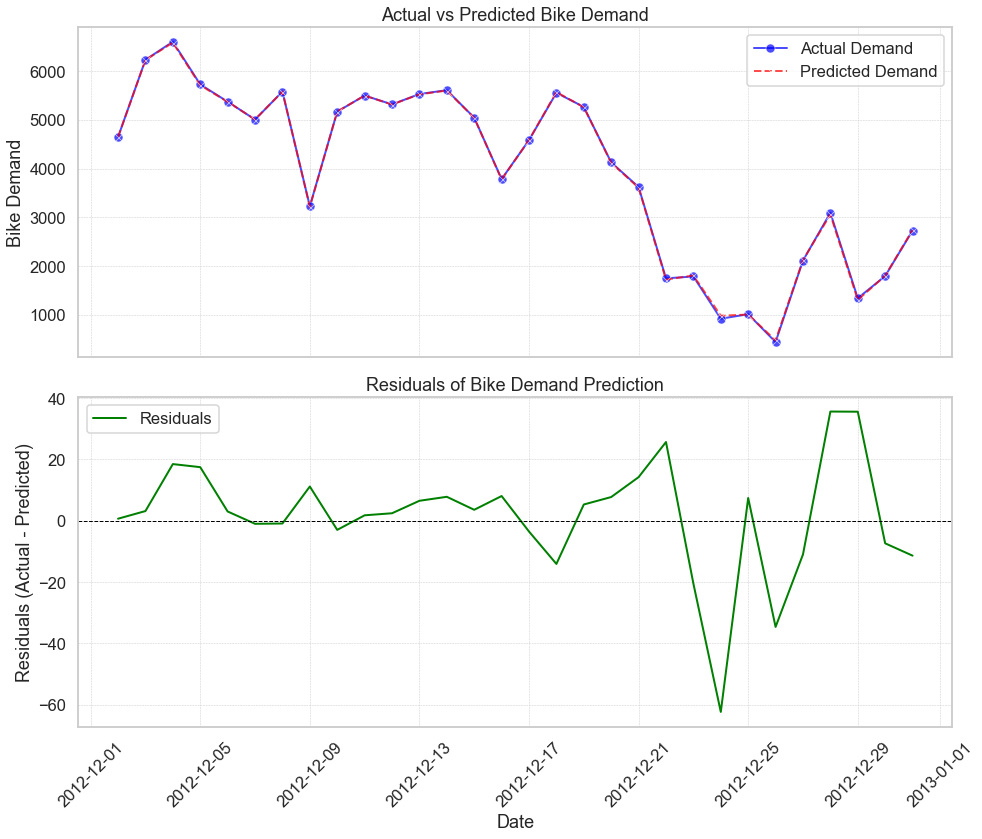

In [26]:
# --- Step 1: Prepare the data ---
# Ensure df_last30 is a safe copy before modifying
df_last30 = df_last30.copy()
df_last30['Predicted'] = y_pred  # Add predictions

# --- Step 2: Set Seaborn theme ---
sns.set_theme(style="whitegrid", context="talk")

# --- Step 3: Create subplots ---
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# --- Plot 1: Actual vs Predicted ---
sns.lineplot(
    ax=axes[0],
    x=df_last30['dteday'], y=df_last30['cnt'],
    label='Actual Demand', color='blue', alpha=0.7,
    linestyle='-', linewidth=2, marker='o'
)
sns.lineplot(
    ax=axes[0],
    x=df_last30['dteday'], y=df_last30['Predicted'],
    label='Predicted Demand', color='red', alpha=0.7,
    linestyle='--', linewidth=2, marker='x'
)
axes[0].set_title("Actual vs Predicted Bike Demand")
axes[0].set_ylabel("Bike Demand")
axes[0].legend()
axes[0].grid(True, linestyle="--", linewidth=0.5)

# --- Plot 2: Residuals ---
residuals = df_last30['cnt'] - df_last30['Predicted']
sns.lineplot(
    ax=axes[1],
    x=df_last30['dteday'], y=residuals,
    label='Residuals', color='green',
    linestyle='-', linewidth=2
)
axes[1].axhline(0, color="black", linestyle="--", linewidth=1)  # reference line
axes[1].set_title("Residuals of Bike Demand Prediction")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Residuals (Actual - Predicted)")
axes[1].legend()
axes[1].grid(True, linestyle="--", linewidth=0.5)

# --- Final touches ---
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3.3. Report the value of the chosen test metric on the provided data.

In [27]:
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 18.758947376296593


## Part 4 - Reflection / comments

**Tasks:**
(Optional) Please share with us any free form reflection, comments or feedback you have in the context of this test task.

**About the Dataset:**

- **Weekday Values**: The `weekday` column ranges from 0 to 6. The dataset does not specify whether the week starts on Monday or Sunday. For clarity, the data description should indicate the starting day of the week, but it was easy to figure out it.

- **Data Quality**: The dataset required only minimal changes, such as updating the date column type and adding a few new columns. Overall, it is in good shape.

**About Some Tasks:**

- **Distribution of Covered Days**: The task to "Visualize the distribution of the covered days depending on the number of available bicycles" is not fully accurate. We lack data on the exact number of available bicycles per day. We can only estimate the minimum required number of bikes by dividing the number of rides by 12. This estimate does not represent the true distribution of bike availability but rather the distribution of daily ride counts, which is less precise.

**General Outcomes:**

- **Weather Impact**: The results align with expectations—people prefer riding in good weather and avoid it in bad weather, suggesting the data source is reliable.

- **Comfortable Weather**: The weather is generally comfortable for riding, with no recorded negative temperatures.

- **Additional Data Needs**: Including additional data such as geographic location, riding duration, and account details could provide valuable insights into riding patterns and enhance the analysis.

## Submission

- [x] Please submit this notebook with your developments in .ipynb and .html formats as well as your requirements.txt file.

## References

[1] Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.